In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("/Users/kanchiharinathbadrinath/Downloads/wine.csv")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.shape

(1599, 12)

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


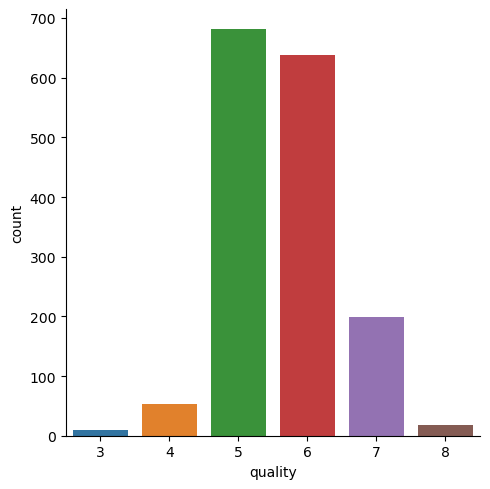

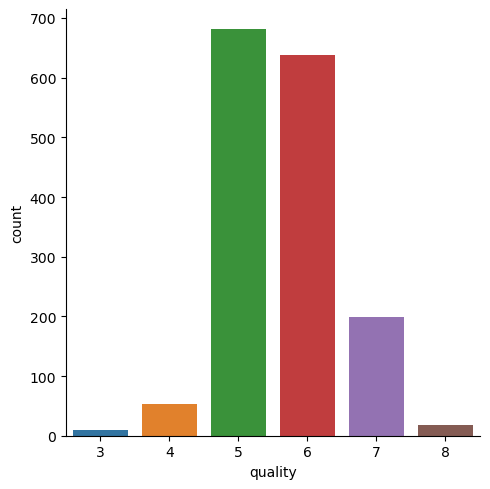

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

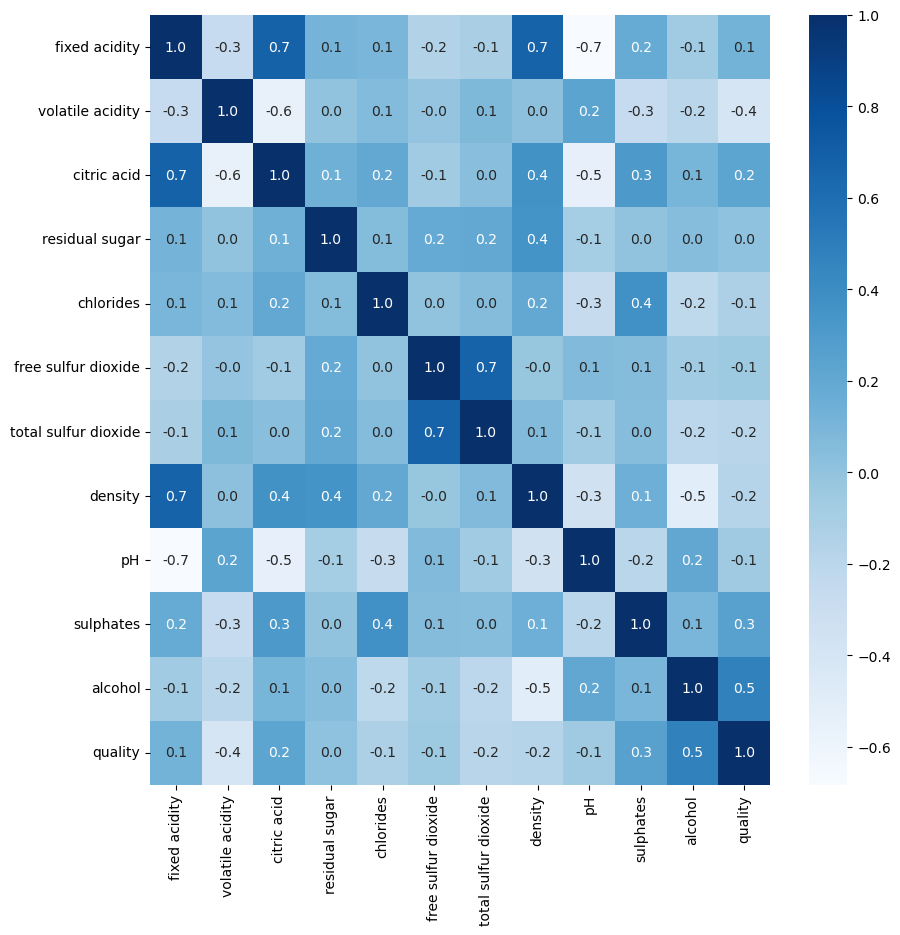

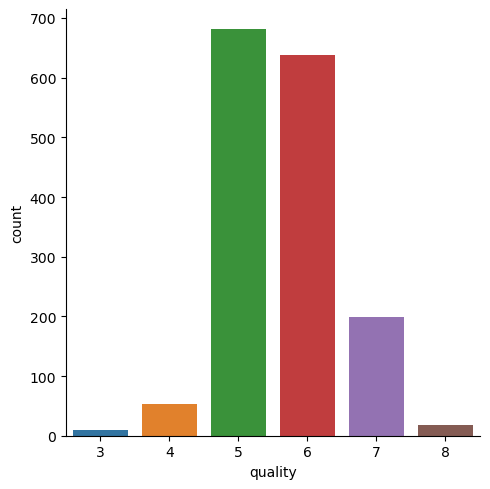

In [19]:
sns.catplot(x='quality', data = df , kind = 'count')
plt.show()

In [12]:
correlation = df.corr()

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar = True,fmt = '.1f',annot = True,  cmap = 'Blues')

<AxesSubplot:>

In [22]:
x = df.drop(columns = 'quality',axis =1)

In [25]:
y = df['quality'].apply(lambda y_value : 1  if y_value >= 7 else 0 )

In [26]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.2,random_state = 3)

In [29]:
print(x.shape,x_train.shape,x_test.shape)

(1599, 11) (1279, 11) (320, 11)


In [31]:
print(y.shape,y_train.shape,y_test.shape)

(1599,) (1279,) (320,)


In [32]:
model = RandomForestClassifier()

In [33]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [35]:
x_train_prediction = model.predict(x_train)
train_data_accuracy = accuracy_score(x_train_prediction,y_train)

In [37]:
print("Accuracy of train data :" , train_data_accuracy )

Accuracy of train data : 1.0


In [38]:
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction,y_test)

In [39]:
print("Accuracy of test data:", test_data_accuracy)

Accuracy of test data: 0.93125


In [42]:
input_data = [7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8]
input_data_as_numpy_array = np.array(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

[0]


/Users/kanchiharinathbadrinath/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


#Here we have converted the wine quality which is >= 7 the the valueis 1 else 0. so after giving the random sample data the model predicted correctly .
